1. Eliminacion de columnas que no aportan al modelo

In [1]:
# importamos biblioteca necesarias para la ejecucion del proceso
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



In [2]:
# se coloca URL de los datos a cargar
url = 'https://raw.githubusercontent.com/luis8903/challege_TelecomX2/refs/heads/main/datos_tratados.csv'

df = pd.read_csv(url)
# revisamos detalle de la carga
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Si,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [3]:
# eliminamos la columna de customerID
df = df.drop('customerID', axis = 1)
df.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Si,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Si,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Si,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [4]:
# cambios campos Churn a numerico para
df.loc[df["Churn"] == "Si", "Churn"] = 1
df.loc[df["Churn"] == "No", "Churn"] = 0

df["Churn"] = df["Churn"].astype(np.int64)
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,1,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [5]:
# separamos la variable objetivo de las variables explicativas
X = df.drop('Churn', axis = 1)
y = df['Churn']

columnas = X.columns

In [6]:
print(X.tail())
print(y)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
7262  Female              0      No         No      13          Yes   
7263    Male              0     Yes         No      22          Yes   
7264    Male              0      No         No       2          Yes   
7265    Male              0     Yes        Yes      67          Yes   
7266    Male              0     Yes        Yes      63           No   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
7262                No             DSL            Yes           No   
7263               Yes     Fiber optic             No           No   
7264                No             DSL             No          Yes   
7265                No             DSL            Yes           No   
7266  No phone service             DSL            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7262               No         Yes          No              No        On

In [7]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [8]:
one_hot

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  sparse_threshold=0,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [9]:
X = one_hot.fit_transform(X)

In [10]:
X

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        6.56000000e+01, 5.93300000e+02, 2.18666667e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.99000000e+01, 5.42400000e+02, 1.99666667e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.39000000e+01, 2.80850000e+02, 2.46333333e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.03000000e+01, 9.27500000e+01, 1.67666667e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        6.78500000e+01, 4.62765000e+03, 2.26166667e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        5.90000000e+01, 3.70760000e+03, 1.96666667e+00]])

In [11]:
columnas = one_hot.get_feature_names_out(columnas)

In [12]:

len(columnas)

41

In [13]:
# Se transforma la variable objetivo
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

y

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
# se calcula la cantidad de poblacion
cantidad = df['Churn'].value_counts()

# Proporción relativa
proporcion = df['Churn'].value_counts(normalize=True) * 100

print("Cantidad :\n", cantidad)
print("\nProporción (%):\n", proporcion)

# se observa que el desbalance es moderado, pues el 74 % de personas deciden quedarse y un 25 % desea cancelar


Cantidad :
 Churn
0    5397
1    1870
Name: count, dtype: int64

Proporción (%):
 Churn
0    74.267235
1    25.732765
Name: proportion, dtype: float64


In [15]:
# aplicamos tecnica de Oversampling (SMOTE)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

y_res
print("Antes:", pd.Series(y).value_counts() )
print("Después de SMOTE:",pd.Series(y_res).value_counts())

Antes: 0    5397
1    1870
Name: count, dtype: int64
Después de SMOTE: 0    5397
1    5397
Name: count, dtype: int64


In [16]:
# se plica tecnica de Undersampling
under = RandomUnderSampler(random_state=42)
X_res, y_res = under.fit_resample(X, y)

print("Antes:", pd.Series(y).value_counts())
print("Después de undersampling:", pd.Series(y_res).value_counts())

Antes: 0    5397
1    1870
Name: count, dtype: int64
Después de undersampling: 0    1870
1    1870
Name: count, dtype: int64


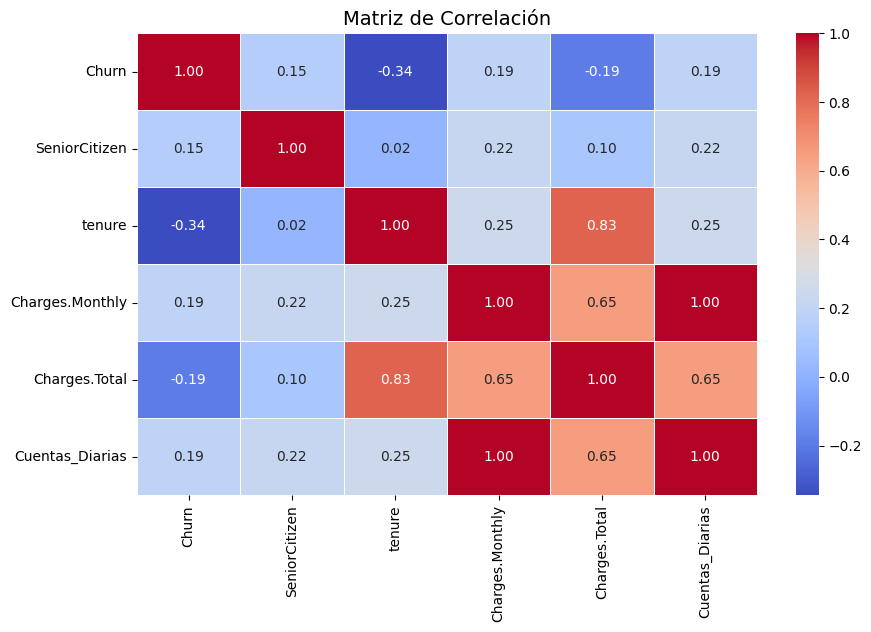

In [33]:
# Calcular matriz de correlación
matriz_corre = df.corr(numeric_only=True)

# Visualizar con seaborn
plt.figure(figsize=(10,6))
sns.heatmap(matriz_corre, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación", fontsize=14)
plt.show()

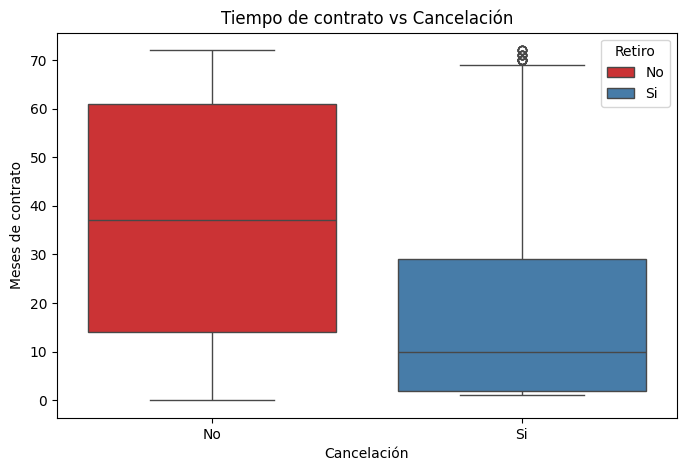

In [18]:
# analisis dirigido
warnings.filterwarnings("ignore")
# Diccionario para traducir 0 → No, 1 → Sí
etiquetas = {0: "No", 1: "Si"}

# Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Churn"].map(etiquetas), y="tenure", data=df, palette="Set1")
plt.title("Tiempo de contrato vs Cancelación")
plt.ylabel("Meses de contrato")
plt.xlabel("Cancelación")
plt.legend(title="Retiro", labels=["No", "Si"])
plt.show()

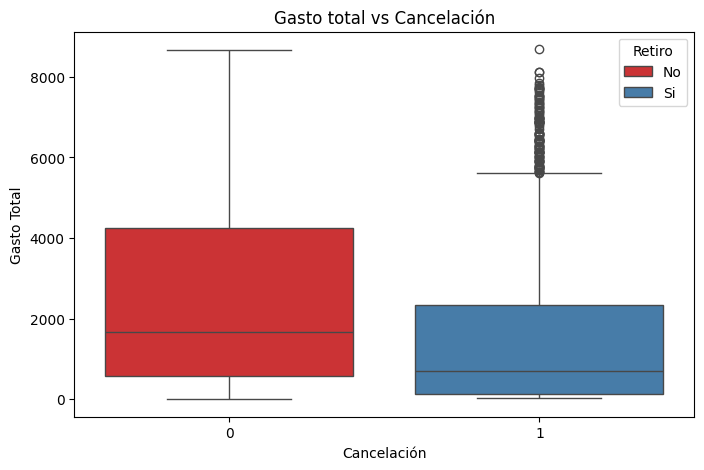

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Charges.Total", data=df, palette="Set1")
plt.title("Gasto total vs Cancelación")
plt.ylabel("Gasto Total")
plt.xlabel("Cancelación")
plt.legend(title="Retiro", labels=["No", "Si"])
plt.show()

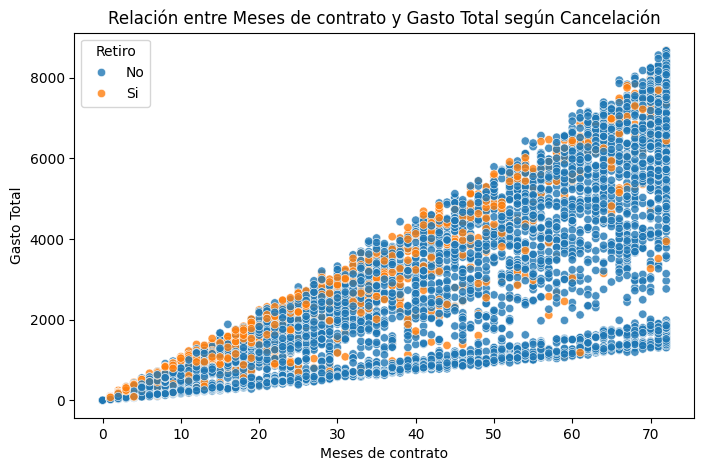

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="tenure", y="Charges.Total", hue=df["Churn"].map(etiquetas), data=df, alpha=0.8)
plt.title("Relación entre Meses de contrato y Gasto Total según Cancelación")
plt.xlabel("Meses de contrato")
plt.ylabel("Gasto Total")
plt.legend(title="Retiro")
plt.show()

In [21]:

#se dividen los datos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  test_size=0.30, random_state = 42)

# aplicamos modelo Baseline
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

print("Modelo Baseline: ",dummy.score(X_test, y_test) * 100)

# aplicamos modelo de arbol de decision
modelo_arbol = DecisionTreeClassifier(random_state =5)
modelo_arbol.fit(X_train, y_train)

modelo_arbol.predict(X_test)
print("Modelo de arbol de decision: ",modelo_arbol.score(X_test, y_test) * 100)



Modelo Baseline:  74.27785419532324
Modelo de arbol de decision:  73.31499312242092


In [22]:
# se realiza proceso de normalizacion
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.887226,0.881805,0.887226
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.753992,0.322915,0.753992
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.138889,0.605788,0.091372,0.605788
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.180556,0.253992,0.075920,0.253992
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.041667,0.449601,0.017922,0.449601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.652778,0.908184,0.590060,0.908184
5082,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.833333,0.912675,0.767818,0.912675
5083,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.418164,0.165893,0.418164
5084,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.875000,0.900200,0.791233,0.900200


In [23]:
# Algoritmo KNN

knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)
X_test_normalizado = normalizacion.transform(X_test)

print(f'Modelo Dummy: {dummy.score(X_test, y_test)* 100}')
print(f'Modelo modelo_arbol: {modelo_arbol.score(X_test, y_test)* 100}')
print(f'Modelo KNN: {knn.score(X_test_normalizado, y_test)* 100}')

y_pred_knn = knn.predict(X_test_normalizado)

print("\n  Resultados KNN")
print("Matrix de confusion: \n",confusion_matrix(y_test, y_pred_knn))
print("\nReporte de Clasificacion: \n", classification_report(y_test, y_pred_knn))


Modelo Dummy: 74.27785419532324
Modelo modelo_arbol: 73.31499312242092
Modelo KNN: 74.36955524988538

  Resultados KNN
Matrix de confusion: 
 [[1363  257]
 [ 302  259]]

Reporte de Clasificacion: 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1620
           1       0.50      0.46      0.48       561

    accuracy                           0.74      2181
   macro avg       0.66      0.65      0.66      2181
weighted avg       0.74      0.74      0.74      2181



In [24]:
# Predicciones
y_pred_tree = modelo_arbol.predict(X_test)

print("\n Resultados Árbol de decisión")
print("Matrix de confusion: \n", confusion_matrix(y_test, y_pred_tree))
print("\nReporte de Clasificacion: \n", classification_report(y_test, y_pred_tree))



 Resultados Árbol de decisión
Matrix de confusion: 
 [[1327  293]
 [ 289  272]]

Reporte de Clasificacion: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1620
           1       0.48      0.48      0.48       561

    accuracy                           0.73      2181
   macro avg       0.65      0.65      0.65      2181
weighted avg       0.73      0.73      0.73      2181



Antes: 0    5397
1    1870
Name: count, dtype: int64
Después de SMOTE: 0    5397
1    5397
Name: count, dtype: int64
Modelo de arbol de decision:  84.59329256994627

 Resultados Árbol de decisión
Matrix de confusion: 
 [[5102  295]
 [1368 4029]]

Reporte de Clasificacion: 
               precision    recall  f1-score   support

           0       0.79      0.95      0.86      5397
           1       0.93      0.75      0.83      5397

    accuracy                           0.85     10794
   macro avg       0.86      0.85      0.84     10794
weighted avg       0.86      0.85      0.84     10794



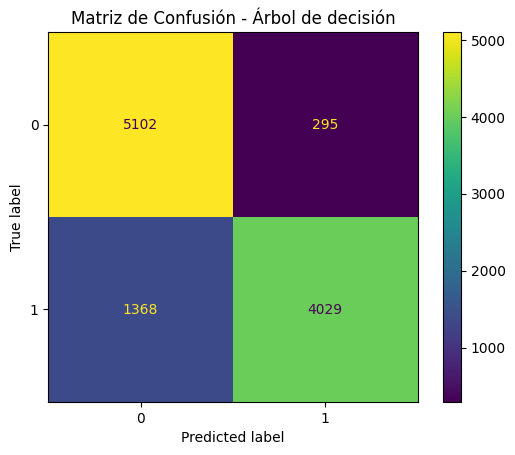

In [47]:
# aplicamos tecnica de Oversampling (SMOTE)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

y_res
print("Antes:", pd.Series(y).value_counts() )
print("Después de SMOTE:",pd.Series(y_res).value_counts())

# aplicamos modelo de arbol de decision
modelo_arbol = DecisionTreeClassifier(random_state =5)
modelo_arbol.fit(X_train, y_train)

modelo_arbol.predict(X_res)
print("Modelo de arbol de decision: ",modelo_arbol.score(X_res, y_res) * 100)
# Predicciones
y_pred_tree = modelo_arbol.predict(X_res)

print("\n Resultados Árbol de decisión")
print("Matrix de confusion: \n", confusion_matrix(y_res, y_pred_tree))
print("\nReporte de Clasificacion: \n", classification_report(y_res, y_pred_tree))

# Matriz de confusión Árbol de decisión
ConfusionMatrixDisplay.from_estimator(modelo_arbol, X_res, y_res)
plt.title("Matriz de Confusión - Árbol de decisión")
plt.show()


  Resultados KNN
Matrix de confusion: 
 [[4815  582]
 [2023 3374]]

Reporte de Clasificacion: 
               precision    recall  f1-score   support

           0       0.70      0.89      0.79      5397
           1       0.85      0.63      0.72      5397

    accuracy                           0.76     10794
   macro avg       0.78      0.76      0.75     10794
weighted avg       0.78      0.76      0.75     10794



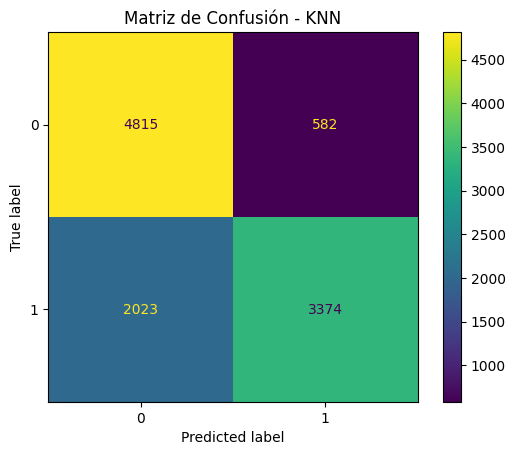

In [50]:
X_test_normalizado = normalizacion.transform(X_res)

y_pred_knn = knn.predict(X_test_normalizado)

print("\n  Resultados KNN")
print("Matrix de confusion: \n",confusion_matrix(y_res, y_pred_knn))
print("\nReporte de Clasificacion: \n", classification_report(y_res, y_pred_knn))

# Matriz de confusión KNN
ConfusionMatrixDisplay.from_estimator(knn, X_test_normalizado, y_res)
plt.title("Matriz de Confusión - KNN")
plt.show()

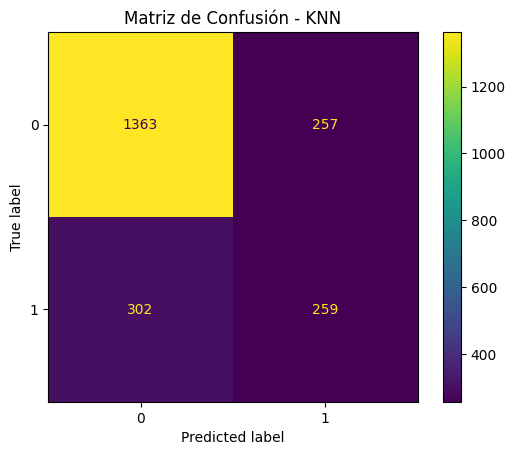

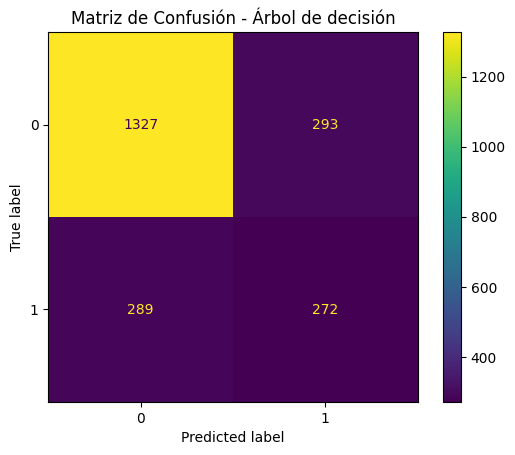

In [37]:
# Matriz de confusión KNN
ConfusionMatrixDisplay.from_estimator(knn, X_test_normalizado, y_test)
plt.title("Matriz de Confusión - KNN")
plt.show()

# Matriz de confusión Árbol de decisión
ConfusionMatrixDisplay.from_estimator(modelo_arbol, X_test, y_test)
plt.title("Matriz de Confusión - Árbol de decisión")
plt.show()

In [32]:
# se realiza analisis de importancia de las variables

# Regresión Logística
regresion_log = LogisticRegression(max_iter=550)
regresion_log.fit(X_train_normalizado, y_train)

# Modelo SVM
modelo_svm = SVC(kernel="linear", probability=True)
modelo_svm.fit(X_train_normalizado, y_train)

# Modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=300, random_state=42)
modelo_rf.fit(X_train, y_train)

# validacion de importancia de las variables segun los modelos

# Import. ModeloRegresión Logística
coeficiente_log = pd.Series(regresion_log.coef_[0], index= columnas).sort_values(key=abs, ascending=False)

# Import. Modelo Random Forest
importancia_rf = pd.Series(modelo_rf.feature_importances_, index= columnas).sort_values(ascending=False)

# Import. Modelo SVM
coeficiente_svm = pd.Series(modelo_svm.coef_[0], index=columnas).sort_values(key=abs, ascending=False)

# KNN
permutacion_impor_knn = permutation_importance(knn, X_test_normalizado, y_test, n_repeats=15, random_state=42)
importancia_knn = pd.Series(permutacion_impor_knn.importances_mean, index=columnas).sort_values(ascending=False)



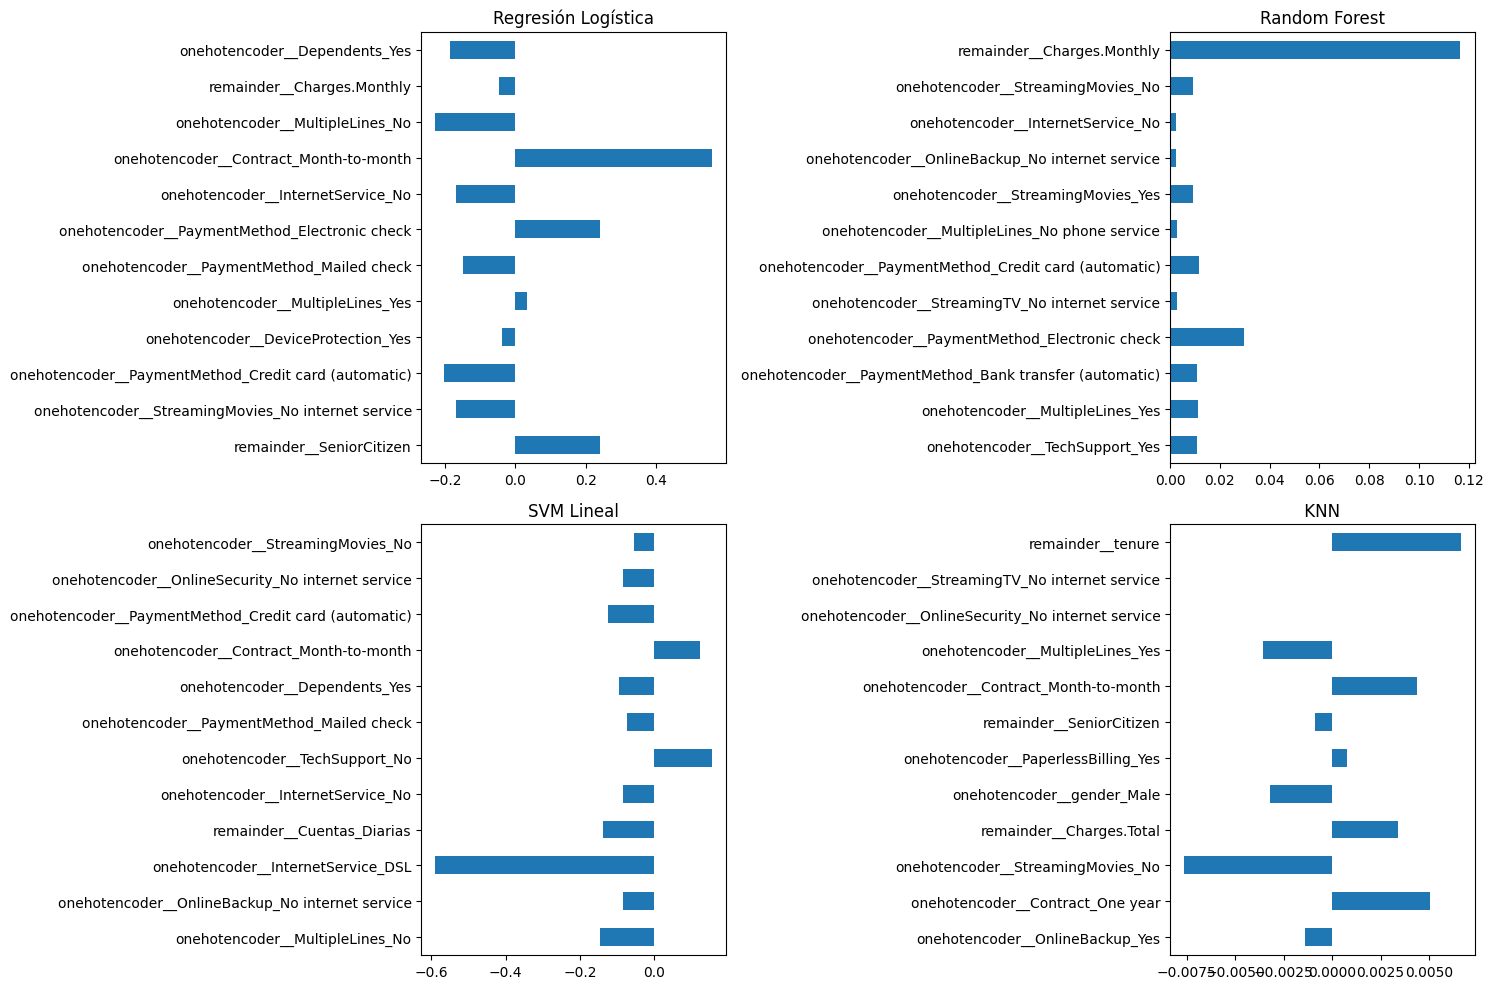

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

coeficiente_log.sample(12).plot(kind="barh", ax=axes[0,0], title="Regresión Logística")
importancia_rf.sample(12).plot(kind="barh", ax=axes[0,1], title="Random Forest")
coeficiente_svm.sample(12).plot(kind="barh", ax=axes[1,0], title="SVM Lineal")
importancia_knn.sample(12).plot(kind="barh", ax=axes[1,1], title=" KNN ")

plt.tight_layout()
plt.show()

In [28]:
# Convertir a DataFrames
df_log = coeficiente_log.rename("Logística").reset_index().rename(columns={"index":"Variable"})
df_rf = importancia_rf.rename("RandomForest").reset_index().rename(columns={"index":"Variable"})
df_svm = coeficiente_svm.rename("SVM").reset_index().rename(columns={"index":"Variable"})
df_knn = importancia_knn.rename("KNN").reset_index().rename(columns={"index":"Variable"})

# Unir por variable
tabla_comparativa = df_log.merge(df_rf, on="Variable", how="outer")\
                          .merge(df_svm, on="Variable", how="outer")\
                          .merge(df_knn, on="Variable", how="outer")

# Ordenar por importancia promedio absoluta
tabla_comparativa["PromedioAbs"] = tabla_comparativa[["Logística","RandomForest","SVM","KNN"]].abs().mean(axis=1)
tabla_comparativa = tabla_comparativa.sort_values("PromedioAbs", ascending=False).reset_index(drop=True)

print("\nTabla comparativa de importancia de variables:")
print(tabla_comparativa.head(15))


Tabla comparativa de importancia de variables:
                                             Variable  Logística  \
0                                   remainder__tenure  -3.026793   
1                            remainder__Charges.Total   1.035339   
2          onehotencoder__InternetService_Fiber optic   0.411324   
3                  onehotencoder__InternetService_DSL  -0.435426   
4              onehotencoder__Contract_Month-to-month   0.559999   
5                    onehotencoder__Contract_Two year  -0.590092   
6       onehotencoder__PaymentMethod_Electronic check   0.240147   
7                            remainder__SeniorCitizen   0.240442   
8                 onehotencoder__PaperlessBilling_Yes   0.313666   
9                    onehotencoder__OnlineSecurity_No   0.198503   
10                    onehotencoder__MultipleLines_No  -0.228238   
11                   onehotencoder__Contract_One year  -0.163151   
12  onehotencoder__PaymentMethod_Credit card (auto...  -0.202899   


In [29]:
import pickle

with open('modelo_onehotencoder.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)

with open('modelo_modelo_rf.pkl', 'wb') as archivo:
    pickle.dump(modelo_rf, archivo)


In [30]:
with open('modelo_champion.pkl', 'wb') as archivo:
    pickle.dump(modelo_arbol, archivo)

In [31]:
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,1,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,0,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667
